<a href="https://colab.research.google.com/github/ramzesssina/ML---labi/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **МЛ Практика 3: Подбор признаков и валидация моделей**

In [1]:
!pip install pandas scikit-learn seaborn scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

In [3]:
df = pd.read_csv("/content/nba.csv")

In [4]:
df

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [5]:
df["max_min_on_fg"] = np.where(df["FG%"] >= 50, 1, 0)
df.max_min_on_fg = df.max_min_on_fg.astype('category')
df['Name'] = df['Name'].astype('category')
df = df.drop("TARGET_5Yrs", axis=1)

In [6]:
Y = df['max_min_on_fg']
X = df.drop('max_min_on_fg', axis=1)

X = X.drop("FG%", axis=1)

In [7]:
df.drop('FG%', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Name           1340 non-null   category
 1   GP             1340 non-null   int64   
 2   MIN            1340 non-null   float64 
 3   PTS            1340 non-null   float64 
 4   FGM            1340 non-null   float64 
 5   FGA            1340 non-null   float64 
 6   3P Made        1340 non-null   float64 
 7   3PA            1340 non-null   float64 
 8   3P%            1329 non-null   float64 
 9   FTM            1340 non-null   float64 
 10  FTA            1340 non-null   float64 
 11  FT%            1340 non-null   float64 
 12  OREB           1340 non-null   float64 
 13  DREB           1340 non-null   float64 
 14  REB            1340 non-null   float64 
 15  AST            1340 non-null   float64 
 16  STL            1340 non-null   float64 
 17  BLK            1340 non-null   fl

In [8]:
df

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,max_min_on_fg
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,1
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,0


# **2: масштабирование признаков**

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Name     1340 non-null   category
 1   GP       1340 non-null   int64   
 2   MIN      1340 non-null   float64 
 3   PTS      1340 non-null   float64 
 4   FGM      1340 non-null   float64 
 5   FGA      1340 non-null   float64 
 6   3P Made  1340 non-null   float64 
 7   3PA      1340 non-null   float64 
 8   3P%      1329 non-null   float64 
 9   FTM      1340 non-null   float64 
 10  FTA      1340 non-null   float64 
 11  FT%      1340 non-null   float64 
 12  OREB     1340 non-null   float64 
 13  DREB     1340 non-null   float64 
 14  REB      1340 non-null   float64 
 15  AST      1340 non-null   float64 
 16  STL      1340 non-null   float64 
 17  BLK      1340 non-null   float64 
 18  TOV      1340 non-null   float64 
dtypes: category(1), float64(17), int64(1)
memory usage: 233.6 KB


In [14]:
X_processed = X.copy()

non = X_processed.dropna().index
X_processed = X_processed.loc[non]
Y = Y.loc[non] # выдавало ошибку с nan значениями

category_columns : list[str] = X_processed.select_dtypes(include=['category']).columns

X_processed = pd.get_dummies(X_processed, columns=category_columns, drop_first=True)

In [15]:
X_processed

,GP,MIN,PTS,FGM,FGA,3P Made,3PA,3P%,FTM,FTA,...,Name_Willie Cauley-Stein,Name_Willie Green,Name_Willie Reed,Name_Willie White,Name_Wilson Chandler,Name_Winston Bennett,Name_Winston Garland,Name_Xavier McDaniel,Name_Zach LaVine,Name_Zach Randolph
0,36,27.4,7.4,2.6,7.6,0.5,2.1,25.0,1.6,2.3,...,False,False,False,False,False,False,False,False,False,False
1,35,26.9,7.2,2.0,6.7,0.7,2.8,23.5,2.6,3.4,...,False,False,False,False,False,False,False,False,False,False
2,74,15.3,5.2,2.0,4.7,0.4,1.7,24.4,0.9,1.3,...,False,False,False,False,False,False,False,False,False,False
3,58,11.6,5.7,2.3,5.5,0.1,0.5,22.6,0.9,1.3,...,False,False,False,False,False,False,False,False,False,False
4,48,11.5,4.5,1.6,3.0,0.0,0.1,0.0,1.3,1.9,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,0.0,0.2,14.3,1.2,1.5,...,False,False,False,False,False,False,False,False,False,False
1336,68,12.6,3.9,1.5,4.1,0.1,0.7,16.7,0.8,1.0,...,False,False,False,False,False,False,False,False,False,False
1337,43,12.1,5.4,2.2,3.9,0.0,0.0,0.0,1.0,1.6,...,False,False,False,False,False,False,False,False,False,False
1338,52,12.0,4.5,1.7,3.8,0.0,0.2,10.0,1.2,1.8,...,False,False,False,False,False,False,False,False,False,False


# **3: Очистка данных и удаление выбросов**

In [16]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [17]:
train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9878
Точность на тестовой выборке: 0.9737

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       224
           1       1.00      0.83      0.91        42

    accuracy                           0.97       266
   macro avg       0.98      0.92      0.95       266
weighted avg       0.97      0.97      0.97       266



LogisticRegression(max_iter=1000)

# **Метод 1: удаление на основе медианы**

In [19]:
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    X_numeric = X.select_dtypes(include=['number'])

    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    IQR = Q3 - Q1

    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [20]:
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

In [21]:
X_processed.describe()

,GP,MIN,PTS,FGM,FGA,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,60.402558,17.647931,6.820166,2.634763,5.902483,0.249661,0.785628,19.308126,1.302784,1.827314,70.407148,1.007600,2.021445,3.028442,1.558992,0.620391,0.366140,1.196012
std,17.481092,8.327441,4.365671,1.686850,3.598820,0.384608,1.063856,16.022916,0.989341,1.326655,10.489838,0.779178,1.362464,2.062357,1.474159,0.410533,0.428534,0.724470
min,11.000000,3.100000,0.700000,0.300000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000
25%,47.000000,10.800000,3.700000,1.400000,3.300000,0.000000,0.000000,0.000000,0.600000,0.900000,64.800000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000
50%,63.000000,16.100000,5.600000,2.100000,4.800000,0.100000,0.300000,22.400000,1.000000,1.500000,71.300000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,0.400000,1.200000,32.500000,1.700000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000
max,82.000000,40.900000,28.200000,10.200000,19.800000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000


In [22]:
X_iqr.describe()

,GP,MIN,PTS,FGM,FGA,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,1251.00000,1251.000000,1251.000000,1251.00000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000
mean,59.53717,16.741247,6.328697,2.45004,5.515747,0.232454,0.737650,19.260432,1.197442,1.687850,70.273461,0.961871,1.901359,2.862670,1.379856,0.577698,0.329097,1.105995
std,17.43383,7.581188,3.787502,1.48390,3.202447,0.345673,0.967312,16.091111,0.827445,1.114334,10.419677,0.725551,1.225283,1.875967,1.133283,0.353211,0.335286,0.611820
min,11.00000,4.100000,0.700000,0.30000,0.800000,0.000000,0.000000,0.000000,0.100000,0.100000,28.600000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000
25%,46.00000,10.600000,3.600000,1.40000,3.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.600000,0.400000,1.000000,1.500000,0.500000,0.300000,0.100000,0.700000
50%,61.00000,15.400000,5.300000,2.00000,4.700000,0.100000,0.300000,22.200000,1.000000,1.400000,71.200000,0.800000,1.600000,2.400000,1.000000,0.500000,0.200000,1.000000
75%,76.00000,21.650000,8.200000,3.20000,6.900000,0.400000,1.100000,32.500000,1.500000,2.200000,77.550000,1.300000,2.500000,3.700000,1.900000,0.800000,0.450000,1.400000
max,82.00000,39.700000,21.900000,8.90000,19.100000,1.600000,4.800000,100.000000,5.000000,6.400000,100.000000,4.200000,7.100000,11.000000,6.100000,2.000000,1.700000,3.900000


In [23]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.9740
Точность на тестовой выборке: 0.9562

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       212
           1       0.94      0.77      0.85        39

    accuracy                           0.96       251
   macro avg       0.95      0.88      0.91       251
weighted avg       0.96      0.96      0.95       251



LogisticRegression(max_iter=1000)

* Точно стала немного меньше, чем была в начале. Значени между X_processed и X_iqr Стали даже лучше, чуть-чуть больше, что не скажешь о Y и y_iqr - в этом случаее все наоборот, так что метод подходит не для всех значений.

# **Метод 2: удаление на основе среднего**

In [ ]:
def remove_outliers_based_on_mean(X, y, mean_multiplier=2):
    X_numeric = X.select_dtypes(include=['number'])

    mean_values = X_numeric.mean()
    std_values = X_numeric.std()

    lower_threshold = mean_values - mean_multiplier * std_values
    upper_threshold = mean_values + mean_multiplier * std_values

    X_filtered = X_numeric[~((X_numeric < lower_threshold) | (X_numeric > upper_threshold)).any(axis=1)]

    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [ ]:
X_mean, y_mean = remove_outliers_based_on_mean(X_processed.copy(), Y.copy())

In [ ]:
X_processed.describe()

,GP,MIN,PTS,FGM,FGA,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,60.402558,17.647931,6.820166,2.634763,5.902483,0.249661,0.785628,19.308126,1.302784,1.827314,70.407148,1.007600,2.021445,3.028442,1.558992,0.620391,0.366140,1.196012
std,17.481092,8.327441,4.365671,1.686850,3.598820,0.384608,1.063856,16.022916,0.989341,1.326655,10.489838,0.779178,1.362464,2.062357,1.474159,0.410533,0.428534,0.724470
min,11.000000,3.100000,0.700000,0.300000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000
25%,47.000000,10.800000,3.700000,1.400000,3.300000,0.000000,0.000000,0.000000,0.600000,0.900000,64.800000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000
50%,63.000000,16.100000,5.600000,2.100000,4.800000,0.100000,0.300000,22.400000,1.000000,1.500000,71.300000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,0.400000,1.200000,32.500000,1.700000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000
max,82.000000,40.900000,28.200000,10.200000,19.800000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000


In [ ]:
X_mean.describe()

,GP,MIN,PTS,FGM,FGA,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.00000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,58.944681,14.869043,5.346915,2.079468,4.711064,0.18266,0.599362,18.450638,1.008191,1.425319,70.533085,0.841809,1.639787,2.480213,1.205532,0.510638,0.279787,0.971064
std,15.778186,5.725961,2.463069,0.989731,2.121241,0.25776,0.733396,15.359180,0.544688,0.747618,8.878276,0.564108,0.920383,1.411769,0.928424,0.277356,0.265190,0.444985
min,26.000000,4.200000,0.900000,0.300000,0.800000,0.00000,0.000000,0.000000,0.100000,0.200000,50.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000
25%,46.000000,10.200000,3.400000,1.300000,3.100000,0.00000,0.000000,0.000000,0.600000,0.800000,64.875000,0.400000,0.900000,1.300000,0.500000,0.300000,0.100000,0.600000
50%,59.000000,14.400000,4.900000,1.900000,4.300000,0.10000,0.300000,21.400000,0.900000,1.300000,70.750000,0.700000,1.400000,2.100000,0.900000,0.500000,0.200000,0.900000
75%,74.000000,19.100000,6.825000,2.700000,5.925000,0.30000,0.900000,31.900000,1.300000,1.900000,77.225000,1.200000,2.200000,3.400000,1.600000,0.700000,0.400000,1.200000
max,82.000000,31.300000,14.100000,5.800000,12.200000,1.00000,2.900000,51.100000,3.000000,4.200000,91.200000,2.500000,4.700000,7.100000,4.500000,1.400000,1.200000,2.500000


In [ ]:
train_and_evaluate(X_mean, y_mean)

Точность на обучающей выборке: 0.9721
Точность на тестовой выборке: 0.9681

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       160
           1       0.96      0.82      0.88        28

    accuracy                           0.97       188
   macro avg       0.96      0.91      0.93       188
weighted avg       0.97      0.97      0.97       188



LogisticRegression(max_iter=1000)

Точность уменьшилась на еще меньше, чем с первым методом. отчеты по тестовой выборке где-то немного улучщись, где-то немного ухудшились. Данный метод удаление на основе среднего для моих значений подходит больше.

# **3: Методы отбора признаков**

# Filter методы

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
selector = SelectKBest(score_func=f_regression, k=3)
X_kbest = selector.fit_transform(X_processed, Y)

In [ ]:
selector.scores_

array([6.92773157, 0.07548895, 2.26707107, ..., 0.18755275, 0.18755275,
       0.18755275])

In [ ]:
X_processed.columns

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', '3P Made', '3PA', '3P%', 'FTM', 'FTA',
       ...
       'Name_Willie Cauley-Stein', 'Name_Willie Green', 'Name_Willie Reed',
       'Name_Willie White', 'Name_Wilson Chandler', 'Name_Winston Bennett',
       'Name_Winston Garland', 'Name_Xavier McDaniel', 'Name_Zach LaVine',
       'Name_Zach Randolph'],
      dtype='object', length=1311)

In [ ]:
X_processed

,GP,MIN,PTS,FGM,FGA,3P Made,3PA,3P%,FTM,FTA,...,Name_Willie Cauley-Stein,Name_Willie Green,Name_Willie Reed,Name_Willie White,Name_Wilson Chandler,Name_Winston Bennett,Name_Winston Garland,Name_Xavier McDaniel,Name_Zach LaVine,Name_Zach Randolph
0,36,27.4,7.4,2.6,7.6,0.5,2.1,25.0,1.6,2.3,...,False,False,False,False,False,False,False,False,False,False
1,35,26.9,7.2,2.0,6.7,0.7,2.8,23.5,2.6,3.4,...,False,False,False,False,False,False,False,False,False,False
2,74,15.3,5.2,2.0,4.7,0.4,1.7,24.4,0.9,1.3,...,False,False,False,False,False,False,False,False,False,False
3,58,11.6,5.7,2.3,5.5,0.1,0.5,22.6,0.9,1.3,...,False,False,False,False,False,False,False,False,False,False
4,48,11.5,4.5,1.6,3.0,0.0,0.1,0.0,1.3,1.9,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,0.0,0.2,14.3,1.2,1.5,...,False,False,False,False,False,False,False,False,False,False
1336,68,12.6,3.9,1.5,4.1,0.1,0.7,16.7,0.8,1.0,...,False,False,False,False,False,False,False,False,False,False
1337,43,12.1,5.4,2.2,3.9,0.0,0.0,0.0,1.0,1.6,...,False,False,False,False,False,False,False,False,False,False
1338,52,12.0,4.5,1.7,3.8,0.0,0.2,10.0,1.2,1.8,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
selector.get_support(indices=True)

array([11, 13, 16])

In [ ]:
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['OREB', 'REB', 'BLK'], dtype='object')


In [ ]:
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.8410
Точность на тестовой выборке: 0.8459

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       224
           1       0.55      0.14      0.23        42

    accuracy                           0.85       266
   macro avg       0.70      0.56      0.57       266
weighted avg       0.81      0.85      0.81       266



LogisticRegression(max_iter=1000)

# **Wrapper методы**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

base_model = LogisticRegression(max_iter=1000)

rfe = RFE(estimator=base_model, n_features_to_select=5)
rfe.fit(X_processed, Y)

selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['PTS', 'FGM', 'FGA', '3PA', 'FTM'], dtype='object')


С толкнулся с главным минусом этого способа, с моим набором данным, код компилировался минут 15.

In [ ]:
X_rfe = X_processed[selected_features]

model = train_and_evaluate(X_rfe, Y)

Точность на обучающей выборке: 0.9765
Точность на тестовой выборке: 0.9662

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       224
           1       1.00      0.79      0.88        42

    accuracy                           0.97       266
   macro avg       0.98      0.89      0.93       266
weighted avg       0.97      0.97      0.96       266



# **Embedded методы**

Коэффициенты модели без регуляризации: [[ 1.07497980e-02 -3.93800115e-02  4.39289019e+00 ... -5.98427175e-02
  -4.48162827e-05 -1.12483348e-01]]
Коэффициенты модели с регуляризацией: [[ 4.26435613e-03 -4.56172711e-02  4.89532889e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
Отобранные признаки: Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', '3PA', '3P%', 'FTM', 'FTA', 'FT%',
       'REB', 'AST', 'BLK', 'TOV'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Коэффициенты модели после отбора признаков: [[ 4.24012977e-03 -4.67899698e-02  4.96390250e+00  1.78059642e+01
  -1.38361775e+01 -1.67304322e+00  6.03805628e-03 -4.91889551e+00
  -8.74828288e-02 -3.90962193e-03  1.70209184e-01 -3.96586195e-02
   5.54436294e-01 -3.59463158e-01]]


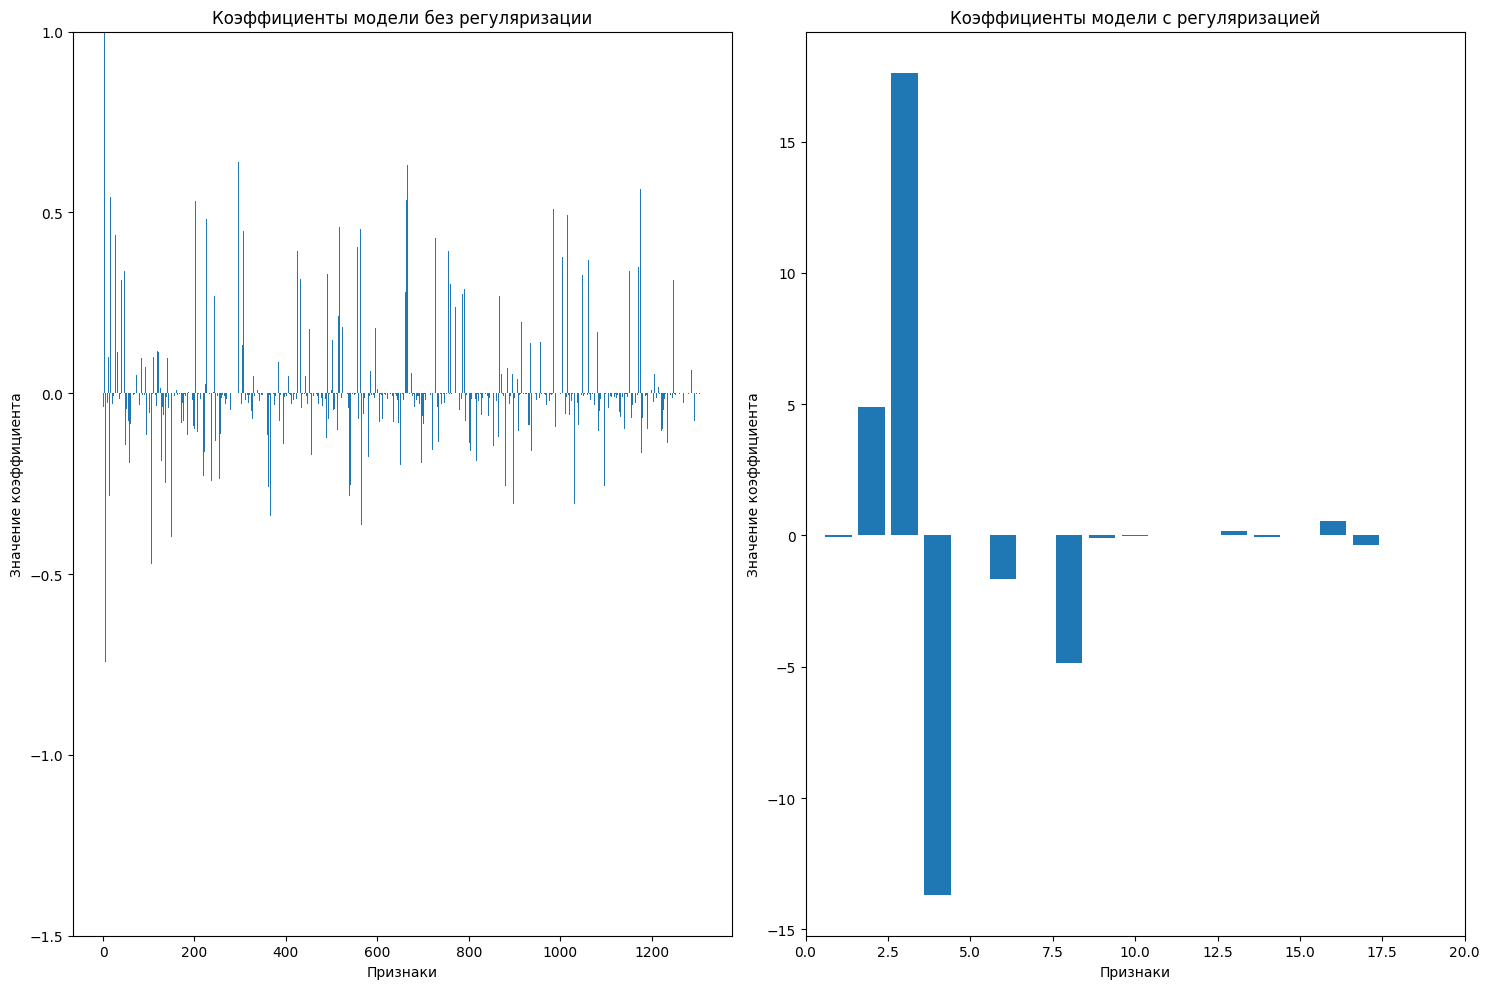

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

model_with_penalty.fit(X_processed, Y)

coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.ylim(-1.5,1)
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlim(0,20)
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")


plt.tight_layout()
plt.show()

In [ ]:
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

model = train_and_evaluate(X_embedded_df, Y)

Точность на обучающей выборке: 0.9774
Точность на тестовой выборке: 0.9737

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       224
           1       1.00      0.83      0.91        42

    accuracy                           0.97       266
   macro avg       0.98      0.92      0.95       266
weighted avg       0.97      0.97      0.97       266



# **Проэксперементировать с разным количеством k, найти лучшую модель, объяснить результат**

Я сразу отметаю метод Wrapper метод, потому что он работает в разы медленней чем другие, но главный признак, что для моих значений он оказался хоть и достаточно точным, но есть другой более точный метод. У меня статистика игроков, мне нужно использовать все числа с минимальными потерями.
Метод который я выбрал - это **Embedded**, он самый точно, к нему мы написали удобные графики, которые достаточно хорошо отображают значения. И достаточно маленький разброс аномалий. Использовал я k=3



# **Изучить метод отбора SequentialFeatureSelector, описать способ работы, сравнить результат с прошлыми методами и объяснить полученный результат**

Последовательный выбор признаков (Sequential Feature Selection) (SFS) доступен в трансформаторе SequentialFeatureSelector. SFS может быть как прямым (Forward-SFS), так и обратным (Backward-SFS).

Sequential Feature Selection - такой метод, в котором мы можем сами выбирать и указывать алгоритму, как именно отбирать признаки

**Forward-SFS**
Это жадная процедура, которая итеративно находит лучший новый признак для добавления к набору отобранных признаков. Начинается с пустого набора признаков (нуля), после находим первый признак, который максимально приблизительно лучший признак оценнки модели. После того как первый признак выбран, мы повторяем процедуру, добавляя новый признак в набор отобранных признаков. Процедура останавливается при достижении желаемого количества отобранных признаков

**Backward-SFS** следует той же идее, но работает ровно в противоположном направлении. Вместо того, чтобы "жадно" начать отбирать первый признак и все последующие, мы берем все возможные признаки и теперь "жадно" удаляем все признаки, которые минимально влияют влияют на нашу модель оценки. Процесс продолжается, пока не останется необходимое количество признаков.

Плюсы:
* Простота в использовании и интерпретации.
* Подходит для небольших наборов данных, где важен точный выбор признаков.
* Достаточная прямоленойность в использовании метода

Минусы
Минусы идут из плюсов.
* Длительное время работы кода
* Не подходит для больших данных
* Достаточно энергозатратный способ, из-за прохода по каждому признаку

Коэффициенты модели без регуляризации: [[ 1.07497980e-02 -3.93800115e-02  4.39289019e+00 ... -5.98427175e-02
  -4.48162827e-05 -1.12483348e-01]]
Коэффициенты модели с регуляризацией: [[ 4.12122793e-03 -4.72315505e-02  4.96910100e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
Отобранные признаки: Index(['FGM', 'FGA', 'FTA', 'BLK', 'TOV'], dtype='object')
Коэффициенты модели после отбора признаков: [[ 2.95836030e+01 -1.47807586e+01 -2.31858702e-02  7.27236783e-01
  -4.82852195e-01]]


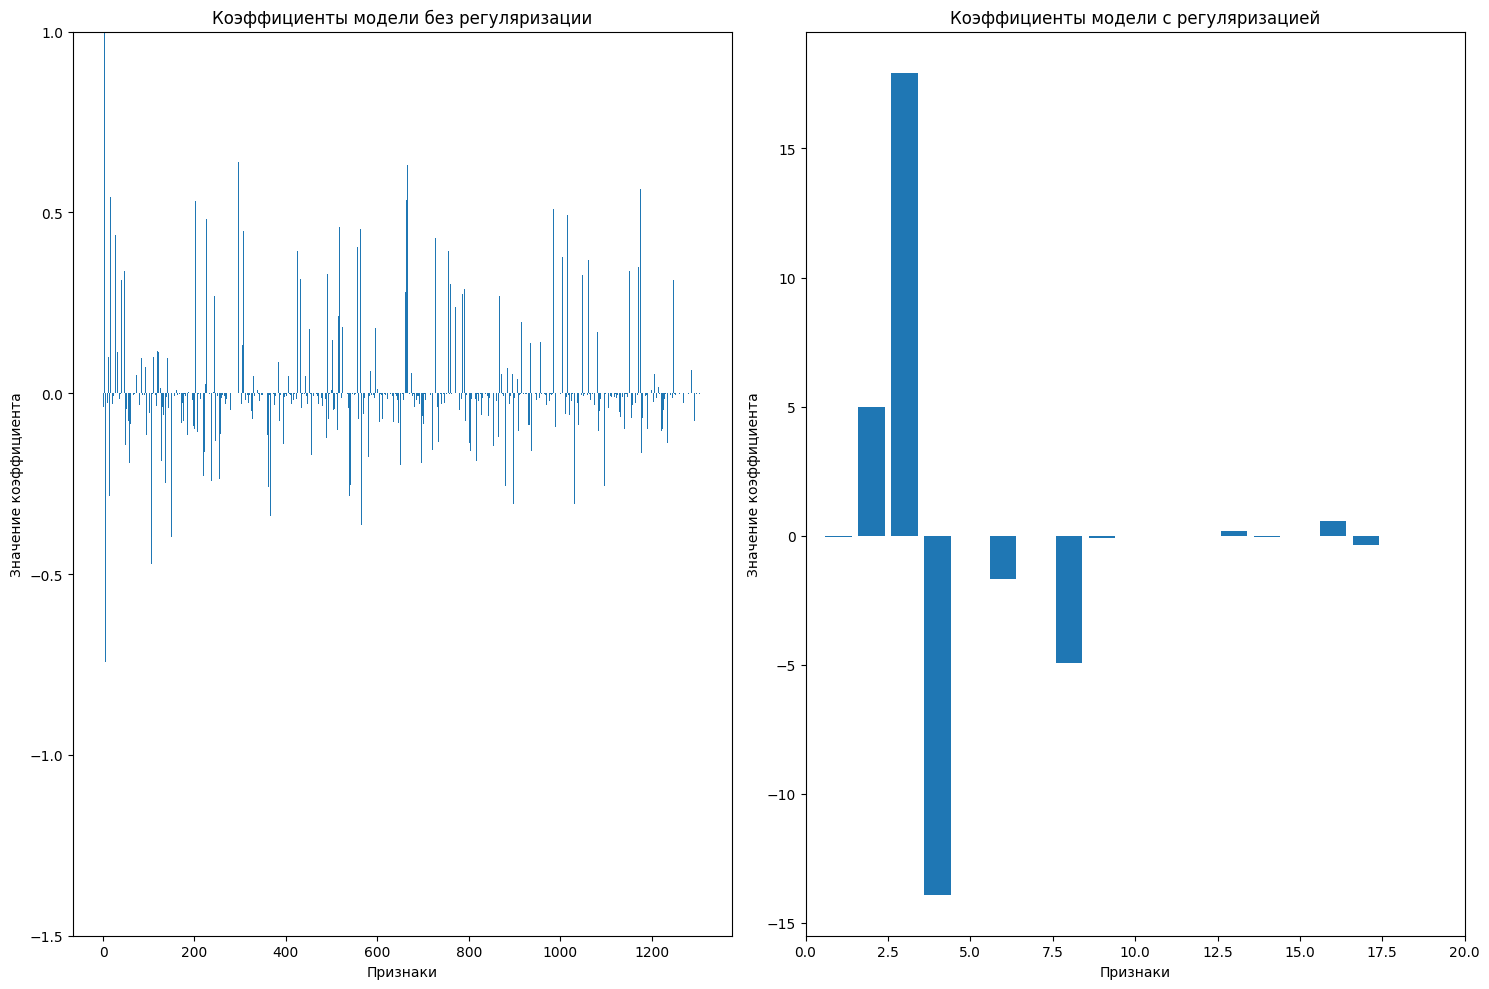

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
import numpy as np
import matplotlib.pyplot as plt

model_no_penalty1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty1.fit(X_processed, Y)

coefficients_no_penalty = model_no_penalty1.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

model_with_penalty.fit(X_processed, Y)

coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

selector = SequentialFeatureSelector(model_with_penalty, n_features_to_select =5, direction='forward')
selector.fit(X_processed, Y)
X_embedded = selector.transform(X_processed)

selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.ylim(-1.5,1)
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlim(0,20)
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")


plt.tight_layout()
plt.show()

Коду потребовалось всего 32 минуты и 47 секунд.

In [26]:
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

model = train_and_evaluate(X_embedded_df, Y)

Точность на обучающей выборке: 0.9614
Точность на тестовой выборке: 0.9549

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       224
           1       1.00      0.71      0.83        42

    accuracy                           0.95       266
   macro avg       0.97      0.86      0.90       266
weighted avg       0.96      0.95      0.95       266



# **Функция активации (Сигмоида)**

In [28]:
import numpy as np

# Сигмоидная функция
def sigmoid(z):
    # Убедимся, что z это numpy массив
    return 1 / (1 + np.exp(-z))

# Простая реализация логистической регрессии
class OwnLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Метод для обучения модели
    def fit(self, X, y):
        # Инициализация весов
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Градиентный спуск
        for idx_,_ in enumerate(range(self.iterations)):
            # Линейная комбинация
            linear_model = np.dot(X, self.weights) + self.bias
            # Применяем сигмоиду для предсказания
            y_pred = sigmoid(linear_model)

            # Вычисляем градиенты
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            # Обновляем веса и смещение
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Метод для предсказания
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        print("regression",linear_model)
        y_pred = sigmoid(linear_model)
        print("sigmoid",y_pred)
        # Возвращаем метки классов (0 или 1)
        return [1 if i > 0.5 else 0 for i in y_pred]

In [29]:
# Пример использования
X = np.array([[0.1, 1.2], [1.1, 2.2], [2.1, 1.9], [1.0, 1.0]])
y = np.array([0, 1, 1, 0])

model = OwnLogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X, y)
predictions = model.predict(X)

regression [-2.48902698  1.89302513  3.0459193  -1.27754449]
sigmoid [0.07663102 0.86910007 0.95460602 0.2179685 ]


# **5: Кросс-валидация**

In [30]:
# Импорт необходимых библиотек
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score

In [37]:
# K-Fold Cross-Validation
def k_fold_cross_validation(X, y, n_splits=7):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

# Пример использования:
k_fold_cross_validation(X = X_processed.to_numpy(), y = Y.to_numpy())

K-Fold Cross-Validation - Средняя точность: 0.9676453037355293
Точности по каждому фолду: [0.9421052631578948, 0.968421052631579, 0.968421052631579, 0.9947368421052631, 0.9736842105263158, 0.9578947368421052, 0.9682539682539683]


Чем больше ставлю значения n_splits, тем дольше работает код, хотя точность особо не увеличивется, оставил значение на n_splits=7. Средняя точность: 0.9676453037355293
Точности по каждому фолду: [0.9421052631578948, 0.968421052631579, 0.968421052631579, 0.9947368421052631, 0.9736842105263158, 0.9578947368421052, 0.9682539682539683]

Хороший способо, достаточно быстро работает и достаточно точный

In [41]:
# ShuffleSplit Cross-Validation
def shuffle_split_cross_validation(X, y, n_splits=10, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Пример использования:
shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy())

ShuffleSplit Cross-Validation - Средняя точность: 0.9657894736842104
Точности по каждому разделению: [0.9661654135338346, 0.9605263157894737, 0.9680451127819549, 0.9586466165413534, 0.9736842105263158, 0.9774436090225563, 0.9699248120300752, 0.9642857142857143, 0.956766917293233, 0.9624060150375939]


Также оставил n_splits=10. Это никак не увеличило точность моих данных. сразу заметна, хоть и небольшая разница в точности, но она имеется, в этом способе она меньше, так что сразу отсекаем.

In [40]:
# Train-Test-Validation Split
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X_processed.to_numpy(), Y.to_numpy())

Точность на валидационных данных: 0.9360902255639098
Точность на тестовых данных: 0.971830985915493


Точно оказась самой маленькой в этом способе

---



Train-Test-Validation Split: Используется, когда нужно четко разделить данные для обучения, подбора параметров и финальной оценки. Подходит для больших наборов данных, где важно иметь отложенную тестовую выборку для окончательной проверки.
Train-Test-Validation Split подойдет для моих данных. У меня достаточно много значений, с которыми он начинает уже долго думать, а этот метод работает с моими данными хорошо. Мне нужны все значения, для моего дата фрейма, где их нужно разделять, сравнивать.